In [1]:
using Pkg
# Pkg.add("Images")
# Pkg.add("ImageIO")
# Pkg.add("Colors")
# Pkg.add("Statistics")
# Pkg.add("Random")
# Pkg.add("Turing")
# Pkg.add("ImageMagick")

In [2]:
#Necessary packages for Image management
using Images
using ImageIO
using Colors
using Statistics

#Packages for variational inference
using Random
using Turing
using Turing: Variational

In [3]:
#constructing binary image out of bayes.bmp

data = load("./bayes.bmp");
img_CHW = channelview(data);
(L,M,N)=size(img_CHW)
img_color=zeros(M,N);
img_color=img_CHW[2,:,:];
mat = convert(Array{Float64}, img_color);
sum=0;
for i in 1:M
    for j in 1:N
        sum=sum+mat[i,j]
    end
end
img_mean=sum/(M*N)
img_binary = zeros(M,N);
for i in 1:M
    for j in 1:N
        if(mat[i,j]>img_mean)
            img_binary[i,j]=1;
        else
            img_binary[i,j]=-1;
        end   
    end
end
newim=zeros(50,50);
for i in 1:50
    for j in 1:50
        newim[i,j]=img_binary[i+70,j+130]
    end
end
img_bw=Gray.(newim);
img_bw

(3, 310, 419)

In [5]:
#Our sample image is a small part of the binary image to save computation time
img_bw2=Gray.(img_binary);
img_bw2
M=50;
N=50;

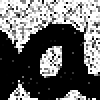

In [6]:
#constructing noisy image
noise=randn(M,N)
img_noisya=newim+0.5*noise;
img_noisy=Gray.(img_noisya);
img_noisy

In [8]:
#Input to imagae denoising
#noisy image
#image: img_noisy
#array: img_noisya

In [9]:
x=img_noisya;
xlin=reshape(x, (M*N));

In [13]:
#Constructing model of Image denoising
#Needs improvemtnt adding Ising model logic for VI
@model model(x) =begin
m ~ MvNormal(0.5*ones(M*N), 0.2*ones(M*N))

for i=1:M*N
    x[i] ~ Normal(m[i],0.01)
end 
end;

In [14]:
m=model(xlin); #Loading data to model

In [15]:
#Performing Variational Inference
advi = ADVI(5, 200)
q = vi(m, advi);

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7159547295955620583
└ @ Turing.Variational C:\Users\Aswin Paul\.julia\packages\Turing\GMBTf\src\variational\VariationalInference.jl:204
[ADVI] Optimizing...: 100%|█████████████████████████████████████████| Time: 1:11:08


In [16]:
typeof(q)

Bijectors.TransformedDistribution{DistributionsAD.TuringDiagMvNormal{Array{Float64,1},Array{Float64,1}},Bijectors.Stacked{Tuple{Bijectors.Identity{1}},1},Multivariate}

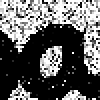

In [18]:
#output
yy=rand(q);
yyy=reshape(yy,(M,N))
img_yy=Gray.(yyy);
img_yy

In [ ]:
#! Comment : This output could manage only to construct back a similar image to the noist input by using variational inference. Needs Imporvement.